In [1]:
import numpy as np
import cshogi

In [2]:
board = cshogi.Board()

In [4]:
PIECE_VALUES = np.array([
    0,  # NONE
    100,  # BPAWN
    200,  # BLANCE
    200,  # BKNIGHT
    300,  # BSILVER
    1000,  # BBISHOP
    1000,  # BROOK
    300,  # BGOLD
    0,  # BKING
    500,  # BPROM_PAWN
    400,  # BPROM_LANCE
    400,  # BPROM_KNIGHT
    300,  # BPROM_SILVER,
    2000,  # BPROM_BISHOP
    2000,  # BPROM_ROOK
    None,  # NOTUSE
    None,  # NOTUSE
    -100,  # WPAWN
    -200,  # WLANCE
    -200,  # WKNIGHT
    -300,  # WSILVER
    -1000,  # WBISHOP
    -1000,  # WROOK
    -300,  # WGOLD
    0,  # WKING
    -500,  # WPROM_PAWN
    -400,  # WPROM_LANCE
    -400,  # WPROM_KNIGHT
    -300,  # WPROM_SILVER,
    -2000,  # WPROM_BISHOP
    -2000,  # WPROM_ROOK
])

HAND_PIECE_VALUES = np.array([
    100,  # HPAWN
    200,  # HLANCE
    200,  # HKNIGHT
    300,  # HSILVER
    300,  # HGOLD
    1000,  # HBISHOP
    1000,  # HROOK
])

In [167]:
def get_value():
    eval_board = PIECE_VALUES[board.pieces]
    eval_board_in_hand = HAND_PIECE_VALUES * np.array(board.pieces_in_hand[0]) 
    - HAND_PIECE_VALUES * np.array(board.pieces_in_hand[1])
    return np.sum(eval_board) + np.sum(eval_board_in_hand)

def negamax(depth):
    if depth==0:
        return get_value()
    if board.is_game_over():
        return -100000 if board.turn==0 else 100000
    values = []
    for move in board.legal_moves:
        board.push(move)
        values.append(-negamax(depth-1))
        board.pop()
    values = np.array(values)
    best_value = np.max(values)
    return best_value

def negaalpha(depth,alpha,beta):
    if depth==0:
        return get_value()
    if board.is_game_over():
        return -100000 if board.turn==0 else 100000
    max_value = -np.inf()
    for move in board.legal_moves:
        board.push(move)
        value = -negaalpha(depth-1,-beta,-alpha)
        board.pop()
        if value>max_value:
            max_value = value
        if value>alpha:
            alpha = value
        if alpha>=beta:
            break
    return max_value

In [274]:
board.reset()
random_play()

0

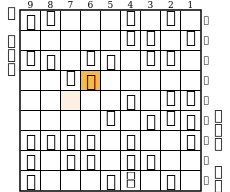

In [275]:
board

In [276]:
negamax(3)

-3300

In [213]:
def random_play():
    while True:
        if board.is_game_over() or len(board.history)>100:
            break
        move = np.random.choice(list(board.legal_moves))
        board.push(move)
    return 1-board.turn

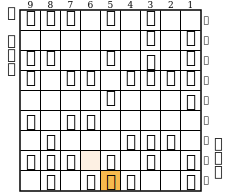

In [121]:
board

In [123]:
board.pieces_in_hand

([0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0])